# Capstone Project - Cuisine Test 

## Introduction 

  This project contains a detail analysis of the **Cuisines** offer by metro cities, which are selected on the basis of **Mercer Cost of Living Ranking 2021, Ease of doing Business Ranking 2019 & Crimes Records 2019**. The project gives details about the different cuisine to be found at each location and help in analyzing the locations by providing information like the competitors and number of other cuisines available around the area and how good is the location is in terms of accessibility as well as its distance from the city center. 

  All these information help us to take an optimum decision to select best city and location in it to establish a **Cuisine shop**.  

 Let’s import the necessary library for the analysis

In [54]:
import pandas as pd 
import numpy as np
import requests
from bs4 import BeautifulSoup
import geocoder
import folium
from scipy.stats import spearmanr
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,silhouette_samples

## Data

Let’s collect the data to judge all cities on different parameters:

 **1.** Mercer Cost of Living Ranking 2021 

 **2.** Ease of doing Business Ranking 2019 

 **3.** Crimes Records 2019 by National Crime Records Bureau

### Mercer Cost of Living Ranking 2021 


  Mercer’s annual  Cost of Living city ranking is based on our Cost of Living survey - one of the most recognized and comprehensive of its kind, with more than 400 cities included. Carried twice per year, the survey is designed to help multinational companies and governments around the world determine compensation strategies for their expatriate employees.

  In addition to evaluating more than 200 goods and services, Mercer’s Cost of Living Survey highlights essential factors — such as currency fluctuations, cost inflation and accommodation price instability — in determining the cost of expatriate packages.
  
  We treat it as our primary data since it includes most of the metro cities of India as well as gives a good idea about the economy of the city, people expenditure in city, and taxes. 

 

In [55]:
data= pd.read_csv('D:/Corsera/IBM/10/new.txt')

We took 200 top cities from the data and then extract all the Indian cities out from it.

In [56]:
data

,Rank_2020,Rank_2021,City,Location,Rank_change
0,2,1,Ashgabat,Turkmenistan,1.0
1,1,2,Hong_Kong,Hong_Kong_(SAR),-1.0
2,45,3,Beirut,Lebanon,42.0
3,3,4,Tokyo,Japan,-1.0
4,4,5,Zurich,Switzerland,-1.0
...,...,...,...,...,...
204,190,205,Brasilia,Brazil,-15.0
205,209,206,Tunis,Tunisia,3.0
206,203,207,Tbilisi,Georgi,-4.0
207,201,208,Lusaka,Zambia,-7.0


In [57]:
df=data.loc[data['Location']=='India']
df

,Rank_2020,Rank_2021,City,Location,Rank_change
77,60,78,Mumbai,India,-18.0
116,101,117,New_Delhi,India,-16.0
157,143,158,Chennai,India,-15.0
169,171,170,Bengaluru,India,1.0
180,185,181,Kolkata,India,4.0


In [58]:
# Preprocessing the data
df=df.reset_index()
df.drop(columns=['Rank_2020','index','Rank_change','Location'],inplace=True)
states={'Mumbai':'Maharashtra','New_Delhi':'Delhi','Chennai':'Tamil Nadu','Bengaluru':'Karnataka','Kolkata':'West Bengal'}
df['State']=states.values()
#df['State']=['Tamil Nadu','Karnataka','West Bengal']
df['Merce_Ranking_2021']=df['Rank_2021']
df.drop(columns=['Rank_2021'],inplace=True)
df

,City,State,Merce_Ranking_2021
0,Mumbai,Maharashtra,78
1,New_Delhi,Delhi,117
2,Chennai,Tamil Nadu,158
3,Bengaluru,Karnataka,170
4,Kolkata,West Bengal,181


###  State-wise Ease of Doing Business Rank

  Ease of doing business ranking of states of India is the annual ease of doing business index of states and union territories of India based on the completion percentage scores of action items points of annual Business Reforms Action Plan (BRAP) under the Make in India initiative. This ranking of states has been done by World Bank since 2015 and facilitated by the Department for Promotion of Industry and Internal Trade (DPIIT), under the Ministry of Commerce and Industry (India) of Government of India based on the progress of states in completing annual reform action plan covering 8 key areas respectively.

  The latest rankings released on September 5, 2020 are based on the performance of states on a wide ranging list of 181 reform points drawn up by the government. This covers 45 business regulatory areas which were used to assess the efficacy and energy of their reforms. These included single window system, inspection enablers, paying taxes, utility permits, and environment, among others. However, the biggest were access to information & transparency enablers, labour regulation-enablers and construction permit enablers. The final ranking is based on two separate scoring systems with the majority of the assessment conducted on the basis of states providing evidence of reforms in policies and procedures undertaken by them.

In [59]:
data=pd.read_excel('D:/Corsera/IBM/10/EoDB.xlsx')
data.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,TABLE 127: STATE-WISE EASE OF DOING BUSINESS RANK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,State/Union Territory,2015,NaN,2016,NaN,2017,NaN,2019
2,NaN,NaN,Score,Rank,Score,Rank,Score,Rank,Rank
3,NaN,Andhra Pradesh,70.12,2,98.78,1,98.3,1,1
4,NaN,Arunachal Pradesh,1.23,32,0.3,31,-,34,29
5,NaN,Assam,14.48,22,14.29,24,84.75,17,20
6,NaN,Bihar,16.41,21,75.82,16,81.91,18,26
7,NaN,Chhattisgarh,62.45,4,97.32,4,97.31,6,6
8,NaN,Goa,21.74,19,18.15,21,57.34,19,24
9,NaN,Gujarat,71.14,1,98.21,3,97.99,5,10


In [60]:
# Preprocessing the data
data.drop(columns=['Unnamed: 0','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'],
          index=[0,1,2,39,40,41,42,43],inplace=True)
data.rename(columns={'Unnamed: 1':'State','Unnamed: 8':'2019_EoDB_Ranking'},inplace=True)
data=data.reset_index(drop=True)
data.head()

,State,2019_EoDB_Ranking
0,Andhra Pradesh,1
1,Arunachal Pradesh,29
2,Assam,20
3,Bihar,26
4,Chhattisgarh,6


In [61]:
df=df.merge(data,on=['State'])
df

,City,State,Merce_Ranking_2021,2019_EoDB_Ranking
0,Mumbai,Maharashtra,78,13
1,New_Delhi,Delhi,117,12
2,Chennai,Tamil Nadu,158,14
3,Bengaluru,Karnataka,170,17
4,Kolkata,West Bengal,181,9


### Crime in India 2019 by National Crime Records Bureau

This is the oldest and the most prestigious publication brought out by NCRB. The data for the report is collected by State Crime Records Bureaux (SCRBx) from the District Crime Records Bureaux (DCRBx) and sent to NCRB at the end of every calendar year under the reference. Data from mega-cities (cities having population of 10 lakh or more as per the latest census) is also collected separately. District-wise data on some IPC heads is collected and published separately. The first edition of 'Crime in India' pertains to the year 1953 and the latest edition of the report pertains to the year 2019.

In [62]:
da= pd.read_csv('D:/Corsera/IBM/10/Crime Record.txt')
da

,Index,City,2017,2018,2019,Percentage_Share_of_City,Actual_Population_(in_Lakhs)_(2011),Rate_of_Total_Cognizable_Crimes_(SLL)+
0,1,Ahmedabad,20747,23720,26693,10.4,63.5,420.2
1,2,Bengaluru,6531,9184,14603,5.7,85.0,171.8
2,3,Chennai,22378,64867,53841,21.0,87.0,619.1
3,4,Coimbatore,8675,12044,13254,5.2,21.5,616.2
4,5,Delhi,11205,11683,16439,6.4,163.1,100.8
5,6,Ghaziabad,5863,4620,4045,1.6,23.6,171.5
6,7,Hyderabad,2177,1680,2718,1.1,77.5,35.1
7,8,Indore,4004,6841,6990,2.7,21.7,322.6
8,9,Jaipur,8538,9984,9611,3.8,30.7,312.8
9,10,Kanpur,4142,4142,4498,1.8,29.2,154.0


In [63]:
# Preprocessing the data
#da.drop(columns=['Percentage_Share_of_City','Actual_Population_(in_Lakhs)_(2011)','Rate_of_Total_Cognizable_Crimes_(SLL)+','Index',"2017","2018"],inplace=True)
da=da[['City','2019']]
da.rename(columns={'2019':'Crimes_in_2019'},inplace=True)
da.head()

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,City,Crimes_in_2019
0,Ahmedabad,26693
1,Bengaluru,14603
2,Chennai,53841
3,Coimbatore,13254
4,Delhi,16439


Combine all the data for three cities in one table for analysis.

In [64]:
df.replace('New_Delhi','Delhi',inplace=True)

In [65]:
df=df.merge(da,on=['City'])
df

,City,State,Merce_Ranking_2021,2019_EoDB_Ranking,Crimes_in_2019
0,Mumbai,Maharashtra,78,13,20139
1,Delhi,Delhi,117,12,16439
2,Chennai,Tamil Nadu,158,14,53841
3,Bengaluru,Karnataka,170,17,14603
4,Kolkata,West Bengal,181,9,1799


Let’s re-rank the data (rank and score) 

In [66]:
df['2019_EoDB_Ranking']=df['2019_EoDB_Ranking'].astype(int)
df['Crimes_in_2019']=df['Crimes_in_2019'].astype(int)
df[['2019_EoDB_Ranking','Crimes_in_2019']]=df[['2019_EoDB_Ranking','Crimes_in_2019']].rank(numeric_only=True)
df[['Merce_Ranking_2021']]=df[['Merce_Ranking_2021']].rank(ascending=False)
df.head()

,City,State,Merce_Ranking_2021,2019_EoDB_Ranking,Crimes_in_2019
0,Mumbai,Maharashtra,5.0,3.0,4.0
1,Delhi,Delhi,4.0,2.0,3.0
2,Chennai,Tamil Nadu,3.0,4.0,5.0
3,Bengaluru,Karnataka,2.0,5.0,2.0
4,Kolkata,West Bengal,1.0,1.0,1.0


The data indicate Kolkata as an ideal choice,where Bangalore follow in 2nd position.

**Note :** Merce Ranking 2021 provide top ranking to those cities with higher cost of living so we reverse the ranking to find out city with low cost of living amount. 

Let's use **Spearman Rank Correlation** since our data is ordinal data. It provides the relationship between the ranked data. 

In [67]:
corr_Merce_EoDB= spearmanr(df['Merce_Ranking_2021'],df['2019_EoDB_Ranking'])
corr_Merce_Crimes= spearmanr(df['Merce_Ranking_2021'],df['Crimes_in_2019'])
corr_EoDB_Crimes= spearmanr(df['Crimes_in_2019'],df['2019_EoDB_Ranking'])
print('Correlation between\n Merce_Ranking_2021 & 2019_EoDB_Ranking:',corr_Merce_EoDB[0],
      '\n Merce_Ranking_2021 & Crimes_in_2019:',corr_Merce_Crimes[0],
      '\n 2019_EoDB_Ranking & Crimes_in_2019:',corr_EoDB_Crimes[0])

Correlation between
 Merce_Ranking_2021 & 2019_EoDB_Ranking: 0.09999999999999999 
 Merce_Ranking_2021 & Crimes_in_2019: 0.7 
 2019_EoDB_Ranking & Crimes_in_2019: 0.39999999999999997


Merce Ranking and Ease of Doing Business show a positive weak relationship and with Crimes data of 2019 Merce Ranked data show a positive strong relationship, whereas Crime data and Ease of doing business report show positive moderate correlation ship


## Coordinates

Now we have to find the cuisines offered by each city, which restaurant is serving it and their exact coordinates to pin them on the map for generating a model help us analyzing the location. First, let’s find out all the **Pincode** provided for the cities. Then we will use **Arcgis  API reverse geocoding** to generate pincode coordinates.  Lastly, we use **Foursquare API** to find different venues around these pincodes and extracting those which offer variety of food.  

In [68]:
# Funtion to get Pincodes
def getPincode(url):
    data  = requests.get(url).text
    soup = BeautifulSoup(data, 'html5lib')
    tables = soup.find_all('table')
    da=pd.read_html(str(tables), flavor='bs4')[0]
    da.drop(columns=['Taluk','State'],inplace=True)
    da.drop_duplicates('Pincode',inplace=True,ignore_index=True)
    return da

# Generating Latitude & Longitude of Pincodes
def getlatlog(df):
    latitude=[]
    longitude=[]
    for code in df['Pincode']:
        g = geocoder.arcgis('{}, India'.format(code))
        while (g.latlng is None):
            g = geocoder.arcgis('{}, India'.format(code))
        latlng = g.latlng
        latitude.append(latlng[0])
        longitude.append(latlng[1])
    df['Latitude']=latitude
    df['Longitude']=longitude
    return df
    

### Kolkata Pincodes

In [69]:
url="https://www.indiatvnews.com/pincode/west-bengal/kolkata/"
Kolkata_Pincode=getPincode(url)

getlatlog(Kolkata_Pincode)
Kolkata_Pincode.head()

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


,Office,District,Pincode,Latitude,Longitude
0,Alipore,Kolkata,700027,22.543717,88.329623
1,Barabazar,Kolkata,700007,22.582515,88.354959
2,A.J.C.Bose Road,Kolkata,700020,22.536970,88.350417
3,Badartala,Kolkata,700044,22.548195,88.253355
4,Baghajatin,Kolkata,700086,22.477890,88.381380


### Foursquare

Now then we have our coordinates , we can use it to find venues around the place using **Foursquare API** and then extract venues which offer cuisines.

In [89]:
# define Foursquare Credentials and Version
CLIENT_ID = 'OMOIR0C2KAW1L2C55PUN2FF5BNF0J0UWUU0BGNEPYOWDBGT2' 
CLIENT_SECRET = 'NQEQ31TATBEL0HVG2GFRX0NV2WEYVVODKMTNVX5LQN4HRIG3'
VERSION = '20180605' 
radius = 500
LIMIT = 2000

In [90]:
# Funtion to Generate Venues 
def getVenues(df):
    venues = []

    for lat, long, post, dist, off in zip(df['Latitude'], df['Longitude'], df['Pincode'],df['District'],df['Office']):
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,CLIENT_SECRET,VERSION,lat,long,radius,LIMIT)
    
        results = requests.get(url).json()["response"]['groups'][0]['items']
    
        for venue in results:
            venues.append((
                post,            dist,             off, 
                venue['venue']['name'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['categories'][0]['name']))
    venues_df = pd.DataFrame(venues)
    venues_df.columns = ['Pincode',  'District', 'Office', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

    return venues_df


# Funtion to eliminate any other venue not include food
def food(df):
    Unwanted_venues=['Racetrack', 'Candy Store','Business Service', "Women's Store",'Furniture / Home Store', 'Multiplex', 'Shopping Mall',
                'Department Store', 'Mobile Phone Shop','Sports Club', 'Plaza','Flea Market', 'Gym', 'Electronics Store', 'Mattress Store',
                'Pharmacy', 'Market','Pier', 'Bookstore', 'Clothing Store','Park','Park','Bus Station', 'Supermarket', 'ATM','Tram Station', 'Train Station',
               'Convenience Store', 'Grocery Store', 'Bank', 'Travel Agency', 'Movie Theater','Playground', 'Athletics & Sports', 'Tennis Court', 
                'Insurance Office', 'Metro Station', 'Boat or Ferry','Neighborhood','Neighborhood','Shoe Store','Museum','Music Store',
                'Military Base','Field','Performing Arts Venue','Planetarium','Deli / Bodega', 'Cricket Ground','Home Service', 'History Museum', 'River', 'IT Services',
                'Concert Hall', 'Airport Lounge', 'Airport Terminal','Health & Beauty Service', 'Indie Movie Theater','Bookstore',
                 'Beach', 'Platform','Light Rail Station','Playground','Arts & Crafts Store',"Men's Store",'Accessories Store', 'Auto Garage',
                'Miscellaneous Shop', 'Record Shop','Convenience Store','Train','Photography Studio','Electronics Store', 'Park','Mobile Phone Shop', 'Fruit & Vegetable Store',
                'Metro Station','Motel', 'Museum', 'Bowling Alley', 'Theater','Pool Hall', 'Pier', 'Harbor / Marina','Cosmetics Shop','Indie Movie Theater', 'Grocery Store', 'Arcade', 'Bike Shop',
               'Sculpture Garden','Furniture / Home Store','Spa', 'Athletics & Sports','Scenic Lookout', 'Tattoo Parlor','Football Stadium','Airport Ticket Counter',
               'Concert Hall', 'Gym Pool', 'Golf Course','Sports Bar', 'Nature Preserve', 'Office','College Library','Historic Site','Jewelry Store', 'Music Store', "Women's Store", 'Art Gallery',
                'Financial or Legal Service','Pet Store','Bridal Shop', 'Airport Terminal', 'Soccer Stadium','Toy / Game Store','Soccer Field', 'Intersection','Smoke Shop', 
               'Shop & Service','Badminton Court','Arcade', 'Trail','Recreation Center','Stadium', 'Platform', 'Bowling Alley', 'Farmers Market','Paper / Office Supplies Store', 'Bus Stop', 'Moving Target',
               'Lake', 'Playground', 'Photography Studio', 'Design Studio','Fish Market','Metro Station', 'Automotive Shop', 'Resort','Taxi Stand','Yoga Studio',
               'Multiplex', 'Sporting Goods Shop', 'Big Box Store', 'Rest Area','Fish & Chips Shop', 'Tennis Court', 'Motorcycle Shop','Cupcake Shop',
               'Rock Climbing Spot', 'Gas Station', 'Hobby Shop','Bus Line','Camera Store','Airport Service','Bike Shop','Antique Shop', 'Scenic Lookout','Liquor Store']
    for x in df.index:
        if df['VenueCategory'][x] in Unwanted_venues:
            df.drop(x, inplace=True)
    df.reset_index(drop=True,inplace=True)
    return df

### Kolkata Venues

In [91]:
Kolkata_venues=getVenues(Kolkata_Pincode)
Kolkata_venues=food(Kolkata_venues)
Kolkata_venues.head()

,Pincode,District,Office,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,700027,Kolkata,Alipore,Panchu Babu's Shop,22.540976,88.328224,Fast Food Restaurant
1,700007,Kolkata,Barabazar,Royal Indian Hotel,22.579491,88.356653,Indian Restaurant
2,700007,Kolkata,Barabazar,Thakur Mahal,22.580705,88.356662,Restaurant
3,700020,Kolkata,A.J.C.Bose Road,Oh! Calcutta,22.538357,88.351406,Bengali Restaurant
4,700020,Kolkata,A.J.C.Bose Road,TGI Fridays,22.538592,88.351398,American Restaurant


One can check the different venues categories present in VenueCategory

In [92]:
#  Kolkata_venues.VenueCategory.unique()

## Analysis

Now we got our venues for all cities, now it is time for analyzing the venues.

First let's apply **Onehot encoding**. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Then using group by function to find the mean of every category at each venue. 

In [93]:
# one hot encoding
onehot = pd.get_dummies(Kolkata_venues[['VenueCategory']], prefix="", prefix_sep="")

onehot['Pincode'] = Kolkata_venues['Pincode'] 
onehot['District'] = Kolkata_venues['District'] 
onehot['Office'] = Kolkata_venues['Office'] 

# move Pincode, District and Office column to the first column
fixed_columns = list(onehot.columns[-3:]) + list(onehot.columns[:-3])
onehot = onehot[fixed_columns]

print(onehot.shape)
onehot.head()

(280, 50)


,Pincode,District,Office,American Restaurant,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bangladeshi Restaurant,Bar,...,Restaurant,Sandwich Place,Snack Place,South Indian Restaurant,Steakhouse,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant
0,700027,Kolkata,Alipore,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,700007,Kolkata,Barabazar,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,700007,Kolkata,Barabazar,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,700020,Kolkata,A.J.C.Bose Road,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,700020,Kolkata,A.J.C.Bose Road,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
grouped = onehot.groupby(["Pincode", "District", "Office"]).mean().reset_index()

print(grouped.shape)
grouped.head()

(56, 50)


,Pincode,District,Office,American Restaurant,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bangladeshi Restaurant,Bar,...,Restaurant,Sandwich Place,Snack Place,South Indian Restaurant,Steakhouse,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant
0,700001,Kolkata,Council House Street,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00
1,700003,Kolkata,Amrita Bazar Partika,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,700004,Kolkata,R.G.Kar Medical College,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
3,700005,Kolkata,Ahritola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,700006,Kolkata,Beadon Street,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


Let's find out 3 most common venue at each location.

In [95]:
num_top_venues = 3

# create columns according to number of top venues
areaColumns = ['Pincode','District','Office']
freqColumns = []
for i in range(num_top_venues):
    freqColumns.append('{} Most Common Venue'.format(i+1))
columns = areaColumns+freqColumns

# create a new dataframe
sorted_venues = pd.DataFrame(columns=columns)
sorted_venues['Pincode'] = grouped['Pincode']
sorted_venues['District'] = grouped['District']
sorted_venues['Office'] = grouped['Office']

for ind in np.arange(grouped.shape[0]):
    row_categories = grouped.iloc[ind, 3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    sorted_venues.iloc[ind, 3:] = row_categories_sorted.index.values[0:num_top_venues]

print(sorted_venues.shape)
sorted_venues.head()

(56, 6)


,Pincode,District,Office,1 Most Common Venue,2 Most Common Venue,3 Most Common Venue
0,700001,Kolkata,Council House Street,Tea Room,American Restaurant,Pizza Place
1,700003,Kolkata,Amrita Bazar Partika,Chinese Restaurant,American Restaurant,Pizza Place
2,700004,Kolkata,R.G.Kar Medical College,Vegetarian / Vegan Restaurant,Bengali Restaurant,Mughlai Restaurant
3,700005,Kolkata,Ahritola,Indian Restaurant,Food,American Restaurant
4,700006,Kolkata,Beadon Street,Pizza Place,Asian Restaurant,Theme Restaurant


Put this data through **K-Means** clustering and lable each venue cluster

To decide the exact number of clusters in K-Means we plot Inertia for each cluster and find optimum number of cluster required

D:\Softwares\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


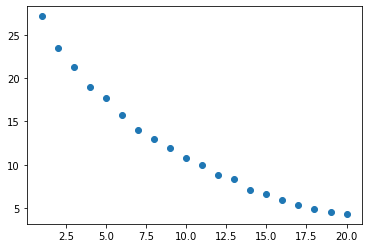

In [96]:
clustering = grouped.drop(['Pincode','District','Office'], 1)
l=[]
kclusters=np.arange(1,21)
for k in kclusters:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=0)
    kmeans.fit(clustering)
    l.append(kmeans.inertia_)
plt.scatter(kclusters,l)
plt.show()

From the elbow curve we can decide that optimum number of cluster should be 5 or 6. Let's just use 5 clusters.

In [97]:
# set number of clusters
kclusters = 5

clustering = grouped.drop(['Pincode','District','Office'], 1)
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(clustering)
kmeans.labels_[0:10]

array([0, 1, 3, 3, 0, 3, 2, 3, 3, 3])

In [98]:
Clustered_venues=sorted_venues[['Pincode','District','Office']]
#all_pincode=pd.concat([Kolkata_Pincode,Bangalore_Pincode])
Clustered_venues=Clustered_venues.merge(Kolkata_Pincode,on=['Pincode','District','Office'])
Clustered_venues['Cluster']=kmeans.labels_
Clustered_venues=Clustered_venues.merge(sorted_venues,on=['Pincode','District','Office'])
Clustered_venues.head()

,Pincode,District,Office,Latitude,Longitude,Cluster,1 Most Common Venue,2 Most Common Venue,3 Most Common Venue
0,700001,Kolkata,Council House Street,22.573210,88.348412,0,Tea Room,American Restaurant,Pizza Place
1,700003,Kolkata,Amrita Bazar Partika,22.602735,88.365215,1,Chinese Restaurant,American Restaurant,Pizza Place
2,700004,Kolkata,R.G.Kar Medical College,22.598203,88.373140,3,Vegetarian / Vegan Restaurant,Bengali Restaurant,Mughlai Restaurant
3,700005,Kolkata,Ahritola,22.595116,88.358235,3,Indian Restaurant,Food,American Restaurant
4,700006,Kolkata,Beadon Street,22.588820,88.364832,0,Pizza Place,Asian Restaurant,Theme Restaurant


## Mapping

Let's map the venues and then map the locations, labeling in which cluster they reside. 

### Venues Map

In [99]:
latitude=22.572646
longitude=88.363895
map_venues  = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lon, post, off, dis, name, cat in zip(Kolkata_venues['VenueLatitude'], Kolkata_venues['VenueLongitude'],
                                               Kolkata_venues['Pincode'],Kolkata_venues['Office'], Kolkata_venues['District'], 
                                               Kolkata_venues['VenueName'],Kolkata_venues['VenueCategory']):
    label = folium.Popup('{} ({}): {} - Venue : {}, {}'.format(off, post, dis, name, cat), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5).add_to(map_venues)
       
map_venues

### Plotting the final Map

In [100]:
map_clusters  = folium.Map(location=[latitude, longitude], zoom_start=12)
# set color scheme for the clusters
colors = ['red','blue','orange','darkgreen','darkblue','black']
# add markers to map
for lat, lon, post, off, dis, cluster in zip(Clustered_venues['Latitude'], Clustered_venues['Longitude'], Clustered_venues['Pincode'], Clustered_venues['Office'], Clustered_venues['District'], Clustered_venues['Cluster']):
    label = folium.Popup('{} ({}): {} - Cluster {}'.format(off, post, dis, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

## Examine Clusters

### Cluster 1

In [101]:
Clustered_venues.loc[Clustered_venues['Cluster'] == 0]

,Pincode,District,Office,Latitude,Longitude,Cluster,1 Most Common Venue,2 Most Common Venue,3 Most Common Venue
0,700001,Kolkata,Council House Street,22.573210,88.348412,0,Tea Room,American Restaurant,Pizza Place
4,700006,Kolkata,Beadon Street,22.588820,88.364832,0,Pizza Place,Asian Restaurant,Theme Restaurant
20,700028,Kolkata,Dumdum,22.620432,88.421150,0,Pizza Place,American Restaurant,Irish Pub
29,700040,Kolkata,Netaji Nagar Kolkata,22.482620,88.353215,0,Pizza Place,Mughlai Restaurant,Café
34,700047,Kolkata,Ganguly Bagan,22.474945,88.367555,0,Pizza Place,American Restaurant,Irish Pub
40,700068,Kolkata,Jodhpur Park,22.506270,88.365589,0,Pizza Place,Coffee Shop,Tea Room
46,700075,Kolkata,Garfa,22.492080,88.384418,0,Pizza Place,Food Truck,Café
51,700089,Kolkata,Kalindi Housing Estate,22.605195,88.407060,0,Pizza Place,Sandwich Place,Café


### Cluster 2

In [102]:
Clustered_venues.loc[Clustered_venues['Cluster'] == 1]

,Pincode,District,Office,Latitude,Longitude,Cluster,1 Most Common Venue,2 Most Common Venue,3 Most Common Venue
1,700003,Kolkata,Amrita Bazar Partika,22.602735,88.365215,1,Chinese Restaurant,American Restaurant,Pizza Place
30,700042,Kolkata,Bosepukur Road,22.518970,88.382783,1,Chinese Restaurant,American Restaurant,Pizza Place
33,700046,Kolkata,Abinash Chaowdhury Lane,22.548170,88.388500,1,Chinese Restaurant,American Restaurant,Pizza Place
39,700067,Kolkata,Lily Biscuit,22.586389,88.385635,1,Optical Shop,Chinese Restaurant,American Restaurant
49,700086,Kolkata,Baghajatin,22.477890,88.381380,1,Chinese Restaurant,American Restaurant,Pizza Place


### Cluster 3

In [103]:
Clustered_venues.loc[Clustered_venues['Cluster'] == 2]

,Pincode,District,Office,Latitude,Longitude,Cluster,1 Most Common Venue,2 Most Common Venue,3 Most Common Venue
6,700008,Kolkata,Barisha,22.478725,88.313759,2,Fast Food Restaurant,American Restaurant,Indian Restaurant
17,700025,Kolkata,Bhawanipore,22.532660,88.345424,2,Indian Sweet Shop,Fast Food Restaurant,Indian Restaurant
19,700027,Kolkata,Alipore,22.543717,88.329623,2,Fast Food Restaurant,American Restaurant,Indian Restaurant


### Cluster 4

In [104]:
Clustered_venues.loc[Clustered_venues['Cluster'] == 3]

,Pincode,District,Office,Latitude,Longitude,Cluster,1 Most Common Venue,2 Most Common Venue,3 Most Common Venue
2,700004,Kolkata,R.G.Kar Medical College,22.598203,88.373140,3,Vegetarian / Vegan Restaurant,Bengali Restaurant,Mughlai Restaurant
3,700005,Kolkata,Ahritola,22.595116,88.358235,3,Indian Restaurant,Food,American Restaurant
5,700007,Kolkata,Barabazar,22.582515,88.354959,3,Restaurant,Indian Restaurant,American Restaurant
7,700011,Kolkata,Narkeldanga,22.575105,88.378381,3,Indian Restaurant,Government Building,American Restaurant
8,700012,Kolkata,Bowbazar Kolkata,22.570155,88.361974,3,Juice Bar,American Restaurant,Pizza Place
9,700013,Kolkata,Dharmatala,22.562310,88.354984,3,Fast Food Restaurant,Hotel,Mughlai Restaurant
10,700016,Kolkata,Elliot Road,22.555430,88.353487,3,Café,Hotel,Nightclub
11,700017,Kolkata,Shakespeare Sarani,22.542820,88.363115,3,Café,Mughlai Restaurant,Italian Restaurant
12,700019,Kolkata,Ballygunge RS,22.530315,88.363083,3,Ice Cream Shop,Café,Pizza Place
13,700020,Kolkata,A.J.C.Bose Road,22.536970,88.350417,3,Café,American Restaurant,Hotel


### Cluster 5

In [105]:
Clustered_venues.loc[Clustered_venues['Cluster'] == 4]

,Pincode,District,Office,Latitude,Longitude,Cluster,1 Most Common Venue,2 Most Common Venue,3 Most Common Venue
22,700030,Kolkata,Ghugudanga,22.625277,88.399370,4,Café,American Restaurant,Pizza Place
45,700074,Kolkata,Dumdum Road,22.620496,88.405120,4,Café,American Restaurant,Pizza Place
53,700095,Kolkata,Golf Green,22.493945,88.361855,4,Café,American Restaurant,Pizza Place


## Validation

For the validation of the clusters **Silhouette Score** were checked for different clusters.

In [106]:
silhouette=silhouette_score(clustering,kmeans.fit_predict(clustering))
silhouette

0.2468874940357451

Silhouette Score for each sample

In [107]:
sample=silhouette_samples(clustering,kmeans.fit_predict(clustering))
sample

array([-0.02876145,  0.84464012,  0.18751934,  0.15640193,  0.19787934,
        0.1497491 ,  0.69586472,  0.14253617,  0.0634408 ,  0.17974612,
        0.18580294,  0.14619918,  0.09195884,  0.17797252,  0.03086915,
        0.07487202,  0.10341827,  0.21924658,  0.13595979,  0.69586472,
        0.3578818 ,  0.06087559,  1.        ,  0.14407872,  0.01042783,
        0.09513326,  0.06064504,  0.03065824,  0.10938884,  0.05936021,
        0.84464012,  0.08121191,  0.09513326,  0.84464012,  0.3578818 ,
        0.15245277,  0.14173994,  0.01365871,  0.20366724,  0.22785028,
        0.18331951,  0.22763324,  0.14600074,  0.2127025 ,  0.07579573,
        1.        ,  0.08951703,  0.0720464 ,  0.15079221,  0.84464012,
        0.13603944,  0.08602955,  0.0067339 ,  1.        ,  0.13243463,
        0.11950875])